In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import re
import scipy.stats as stats

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


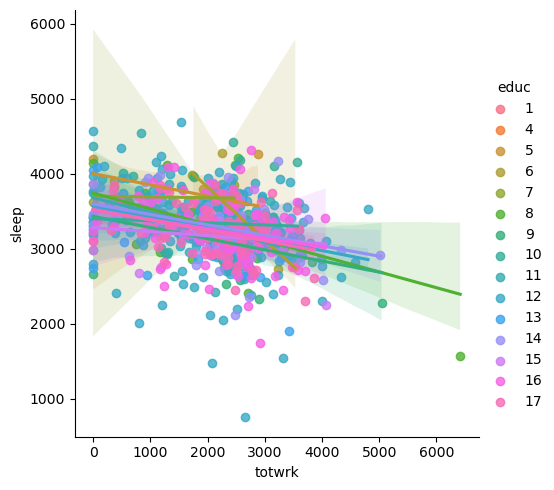

In [9]:
sns.lmplot(x='totwrk', y='sleep', hue='educ', data=df)

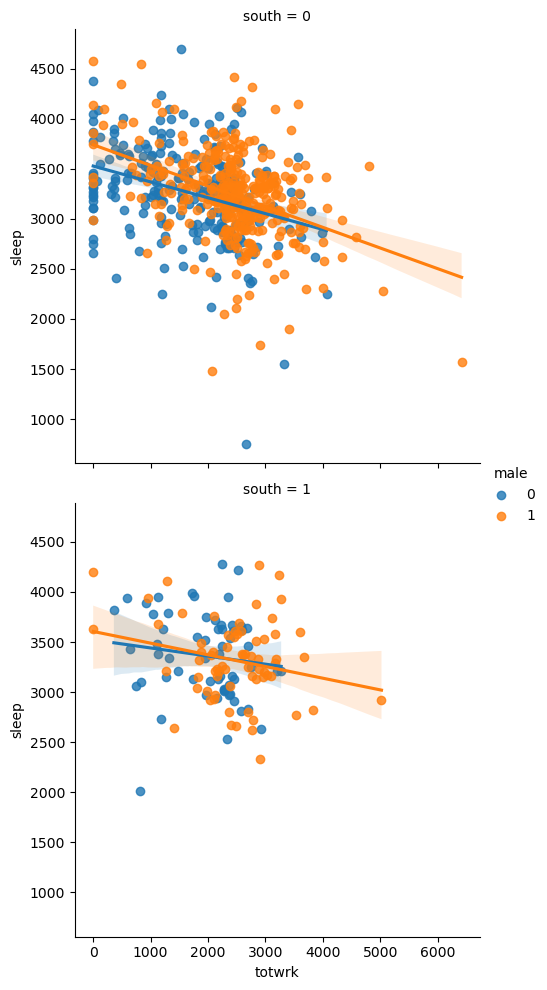

In [10]:
sns.lmplot(x='totwrk', y='sleep', hue='male', row='south', data=df)

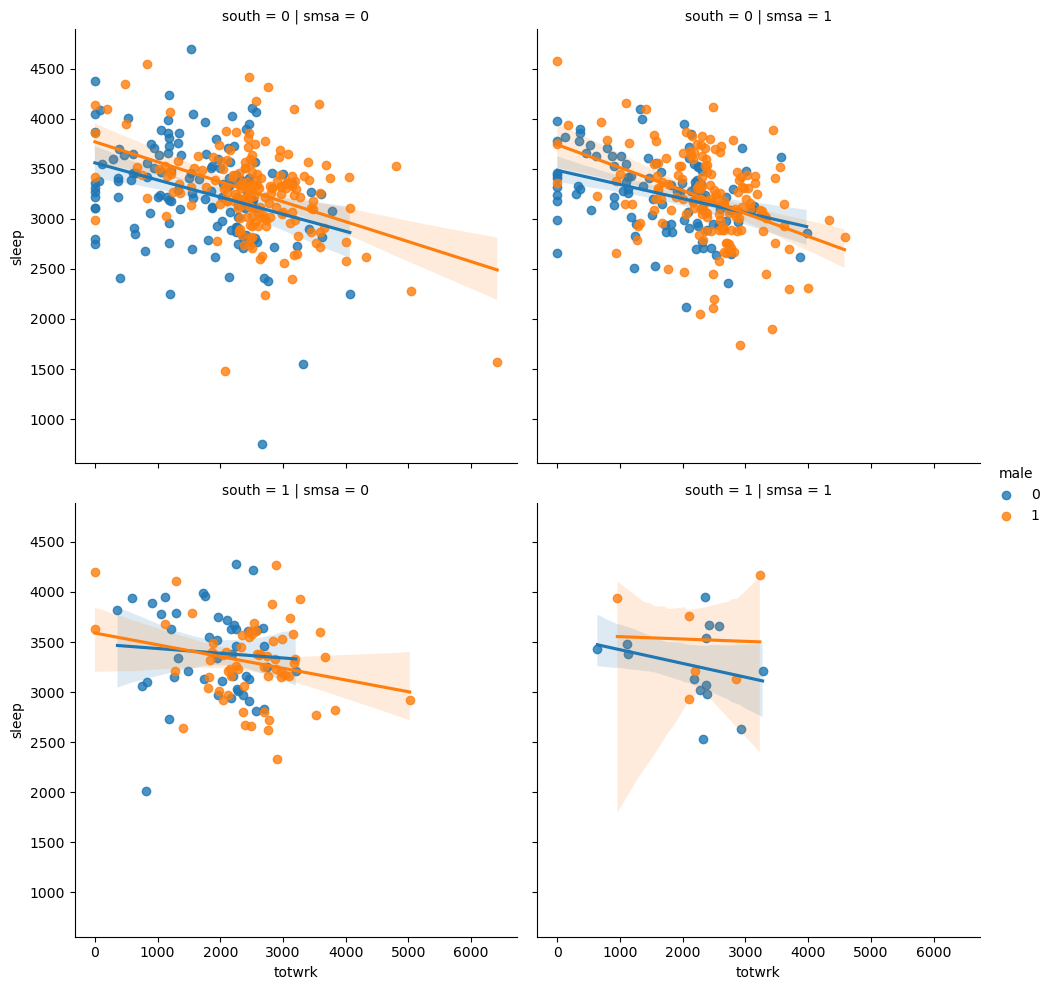

In [12]:
sns.lmplot(x='totwrk', y='sleep', hue='male', row='south', col='smsa',data=df)

In [14]:
date_string = '''R2                      0.115          0.126  '''
np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

array([0.115, 0.126])

In [15]:
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

$$
H_0: \beta_{male} = \beta_{male*totwrk} = \beta_{age*male} = \beta_{smsa*male} = 0\\
$$
$$
H_1:\beta_{male}^2 = \beta_{male*totwrk}^2 = \beta_{age*male}^2 = \beta_{smsa*male}^2 > 0 \\ 
$$

In [17]:
F_obs = (unrest - rest)/(1-unrest)*(706-8)/4
F_obs.round(2)

2.2

In [18]:
alpha = 0.05 # Уровень значимости
#stats.f.ppf(alpha, q,df)
F_cr = stats.f.ppf(1-alpha,4,706-8)
F_cr

2.384692685857469

F_{obs}<F_{crit} нет оснований отвергнуть гипотезу

## 2 небинарная

In [21]:
df

,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641
...,...,...,...,...,...
303,1.01,I,VS1,HRD,8175
304,1.02,F,VVS2,HRD,10796
305,1.06,H,VVS2,HRD,9890
306,1.02,H,VS2,HRD,8959


In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/Diamond.csv')
# Метод .loc[] фильтрует данные таблицы по строкам и столбцам.
# Метод  "df.loc[:,['carat']]" делает срез данных и означает,
# что из датафрейма выбираются все строки(это делается с помощью знака ":") столбца "carat".
df_all = pd.get_dummies(df.loc[:,['carat','colour','certification','price']])
df_all

,carat,price,colour_D,colour_E,colour_F,colour_G,colour_H,colour_I,certification_GIA,certification_HRD,certification_IGI
0,0.30,1302,1,0,0,0,0,0,1,0,0
1,0.30,1510,0,1,0,0,0,0,1,0,0
2,0.30,1510,0,0,0,1,0,0,1,0,0
3,0.30,1260,0,0,0,1,0,0,1,0,0
4,0.31,1641,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
303,1.01,8175,0,0,0,0,0,1,0,1,0
304,1.02,10796,0,0,1,0,0,0,0,1,0
305,1.06,9890,0,0,0,0,1,0,0,1,0
306,1.02,8959,0,0,0,0,1,0,0,1,0


In [22]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+colour_E+colour_F+colour_G+colour_H+colour_I+certification_HRD+certification_IGI',data=df_all).fit()
model_d.params

Intercept            5.866015
carat                5.667499
I(carat ** 2)       -2.153394
colour_E            -0.076348
colour_F            -0.152412
colour_G            -0.227155
colour_H            -0.313470
colour_I            -0.408190
certification_HRD    0.042463
certification_IGI    0.085451
dtype: float64

In [26]:
model_d.f_test('colour_E=colour_F=colour_G=colour_H=colour_I=0')  ## F наблюдаемое

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=71.54686523424247, p=5.202465260125759e-49, df_denom=298, df_num=5>

In [27]:
stats.f.ppf(1-0.01,5,len(df_all)-5).round(2)  ## F критическая

3.08

$$
F_(obs) > F (cr) категориальная переменная цвета является значимой
$$

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


In [40]:
df['slp2'] = df['sleep']**2
df['slp3'] = df['sleep']**3
df['slp4'] = df['sleep']**4

In [60]:
slp = smf.ols(data=df , formula= 'sleep~totwrk+age+male+smsa+south+I(sleep**2)+I(sleep**3)+I(sleep**4)'). fit()

In [61]:
slp.params

Intercept        1.605267e-02
totwrk           5.020011e-03
age              1.887220e-01
male            -2.643203e+00
smsa             1.829892e+00
south            7.283419e-01
I(sleep ** 2)    9.043929e-04
I(sleep ** 3)   -2.698878e-07
I(sleep ** 4)    2.645303e-11
dtype: float64

In [62]:
slp_main = smf.ols(data=df , formula = 'sleep~totwrk+age+male+smsa+south').fit()
slp.params.round

<bound method Series.round of Intercept        1.605267e-02
totwrk           5.020011e-03
age              1.887220e-01
male            -2.643203e+00
smsa             1.829892e+00
south            7.283419e-01
I(sleep ** 2)    9.043929e-04
I(sleep ** 3)   -2.698878e-07
I(sleep ** 4)    2.645303e-11
dtype: float64>

In [56]:
slp.rsquared

0.9965473161990851

In [64]:
slp_main.rsquared 

0.13052502651817655

In [65]:
stats.f.ppf(1-0.05,3,len(df)-3).round(2)  ## F критическая

2.62

In [66]:
F_obs = (slp.rsquared - slp_main.rsquared)/(1- slp_main.rsquared)*(706-9)/3

In [67]:
F_obs

231.41073801905964